# Evaluate Effect of Parallelism
Show the effect of increasing the number of node replicas on training rate

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import os

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


## Load in the Data
We need a list of models and paths to their output directories

In [2]:
results = pd.read_json('mpnn-results.json')

## Plot the `dielectric-constant-charges` model
We've run this on multiple node counts

In [3]:
subset = results.query('entries==117232 and network=="dielectric-constant-charges" and batch_size<32768').sort_values('nodes')

In [4]:
cmap = cm.get_cmap('Blues')

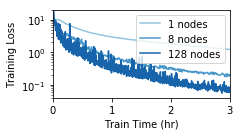

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(3.5, 2)

for i, (_, m) in enumerate(subset.iterrows()):
    log = pd.read_csv(os.path.join(m['path'], 'log.csv'))
    ax.semilogy(log['epoch_time'].cumsum() / 3600, log['loss'], color=cmap((i+2)/5), label=f'{m["nodes"]} nodes')

ax.set_xlabel('Train Time (hr)')
ax.set_ylabel('Training Loss')
ax.set_xlim(0, 3)
ax.set_ylim(4e-2, 20)
ax.legend()
fig.tight_layout()
fig.savefig(os.path.join('figures', 'multi-node-training.png'), dpi=320)
fig.savefig(os.path.join('figures', 'multi-node-training.eps'))

*Finding*: The 128-node moel has the fastest training (as measured by the training loss), but also the largest noise due to the very large batch sizes